In [13]:
import pandas as pd
dataset_df = pd.read_csv('dataset.csv')
drug1_df = pd.read_csv('drug1 2.csv')

# Display the first few rows of the dataframe and its summary
dataset_df.head(), dataset_df.info(), dataset_df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34284 entries, 0 to 34283
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   web-scraper-order      34284 non-null  object 
 1   web-scraper-start-url  34284 non-null  object 
 2   Links                  34284 non-null  object 
 3   Links-href             34284 non-null  object 
 4   Name                   34284 non-null  object 
 5   Uses                   34121 non-null  object 
 6   Price                  24903 non-null  object 
 7   Composition            34284 non-null  object 
 8   Side_effects           33649 non-null  object 
 9   Alcohol                29499 non-null  object 
 10  Pregnancy              34109 non-null  object 
 11  Breast feeding         32835 non-null  object 
 12  Driving                28941 non-null  object 
 13  Kidney                 28004 non-null  object 
 14  Liver                  28004 non-null  object 
 15  Po

(  web-scraper-order                            web-scraper-start-url  \
 0      1698600802-3  https://www.1mg.com/drugs-all-medicines?page=50   
 1      1698600802-3  https://www.1mg.com/drugs-all-medicines?page=50   
 2    1698606345-964  https://www.1mg.com/drugs-all-medicines?page=18   
 3    1698606345-964  https://www.1mg.com/drugs-all-medicines?page=18   
 4      1698600815-7  https://www.1mg.com/drugs-all-medicines?page=50   
 
                                                Links  \
 0  Aceloflam Plus TabletMRP₹94Prescription Requir...   
 1  Aceloflam Plus TabletMRP₹94Prescription Requir...   
 2  Aceloflam Plus TabletMRP₹63Prescription Requir...   
 3  Aceloflam Plus TabletMRP₹63Prescription Requir...   
 4  Adriamycin 50mg InjectionMRP₹889Prescription R...   
 
                                           Links-href  \
 0  https://www.1mg.com/drugs/aceloflam-plus-table...   
 1  https://www.1mg.com/drugs/aceloflam-plus-table...   
 2  https://www.1mg.com/drugs/aceloflam-plus-

In [14]:
import re
import string

# Redefine the function with all necessary imports and variable definitions inside
def extract_drug_names_v2(composition):
    # Define punctuation while keeping hyphens
    punctuation = string.punctuation.replace("-", "")
    # Remove dosages and split by '+' for combination drugs
    drugs = re.sub(r'\([^)]*\)', '', composition)
    drugs = drugs.split('+')
    # Clean up each drug name
    cleaned_drugs = [drug.strip().lower().translate(str.maketrans('', '', punctuation)) for drug in drugs]
    return cleaned_drugs

# Apply the updated function to the Composition column
dataset_df['cleaned_composition'] = dataset_df['Composition'].apply(extract_drug_names_v2)

# Display the first few entries to verify the changes
dataset_df[['Composition', 'cleaned_composition']].head()


,Composition,cleaned_composition
0,Aceclofenac (100mg) + Paracetamol (325mg),"[aceclofenac, paracetamol]"
1,Aceclofenac (100mg) + Paracetamol (325mg),"[aceclofenac, paracetamol]"
2,Aceclofenac (100mg) + Paracetamol (325mg),"[aceclofenac, paracetamol]"
3,Aceclofenac (100mg) + Paracetamol (325mg),"[aceclofenac, paracetamol]"
4,Doxorubicin (Plain) (50mg),[doxorubicin]


In [15]:
# Display the first few standardized drug names from "drug1 2.csv" for inspection
drug1_df['drug'].head(), drug1_df['drug'].unique()[:10]


(0    Mirtazapine
 1     Mesalamine
 2        Bactrim
 3       Contrave
 4         LEVORA
 Name: drug, dtype: object,
 array(['Mirtazapine', 'Mesalamine', 'Bactrim', 'Contrave', 'LEVORA',
        'Miconazole', 'Nuvigil', 'Ciprofloxacin', 'Trazodone',
        'Aripiprazole'], dtype=object))

In [16]:
# Checking missing values for 'Side_effects' and 'How_to_use' in "dataset.csv"
missing_values = dataset_df[['Side_effects', 'How_to_use']].isnull().sum()
missing_values


Side_effects    635
How_to_use       33
dtype: int64

In [17]:
# Flatten the list of drugs in "dataset.csv" for easier comparison and create a set for unique entries
from itertools import chain




dataset_df['cleaned_composition'] = dataset_df['Composition'].apply(extract_drug_names_v2)

# Flatten the list of drugs for easier comparison and create a set for unique entries
flattened_drug_list = set(chain.from_iterable(dataset_df['cleaned_composition']))

# Display a sample of unique drug names from "dataset.csv"
list(flattened_drug_list)[:10]

['trifarotene',
 'solifenacin',
 'netilmicin',
 'lovastatin',
 'hyoscine butylbromide',
 'l-alanyl-l-glutamine',
 'ciprofloxacin',
 'glycerol',
 'teicoplanin',
 's-adenosyl l-methoinine disulfate tosylate']

In [18]:
# Install fuzzywuzzy library
!pip install fuzzywuzzy

# Import the necessary part of the library
from fuzzywuzzy import process

# Function to perform fuzzy matching
def fuzzy_match_drugs(drug_list, query_list, threshold=80):
    matches = {}
    for drug in drug_list:
        # Get the best match above the threshold
        match, score = process.extractOne(drug, query_list)
        if score >= threshold:
            matches[drug] = match
    return matches

# Drug lists for matching
drug_list_drug1 = list(drug1_df['drug'].unique())
unique_drugs_dataset = list(flattened_drug_list)

# Perform fuzzy matching
fuzzy_matches = fuzzy_match_drugs(drug_list_drug1, unique_drugs_dataset, threshold=80)

# Display the fuzzy matched drugs
fuzzy_matches



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


{'Mirtazapine': 'mirtazapine',
 'Mesalamine': 'mesalazine',
 'Miconazole': 'miconazole',
 'Ciprofloxacin': 'ciprofloxacin',
 'Trazodone': 'trazodone',
 'Aripiprazole': 'aripiprazole',
 'Oxybutynin': 'oxybutynin',
 'Clonazepam': 'clonazepam',
 'Sodium oxybate': 'sodium tauroglycocholate',
 'Lamotrigine': 'lamotrigine',
 'Blisovi Fe 1 / 20': 'poliomyelitis virus type 1',
 'Ivermectin': 'ivermectin',
 'Actos': 'placenta extracts',
 'Duloxetine': 'duloxetine',
 'Escitalopram': 'citalopram',
 'Gabapentin': 'gabapentin',
 'Levonorgestrel': 'levonorgestrel',
 'Ethinyl estradiol / etonogestrel': 'estradiol',
 'Etonogestrel': 'levonorgestrel',
 'Nitrofurantoin': 'nitrofurantoin',
 'Ethinyl estradiol / norgestimate': 'estradiol',
 'Guaifenesin / pseudoephedrine': 'ephedrine',
 'Phentermine / topiramate': 'topiramate'}

In [19]:
# Convert the fuzzy_matches dictionary to a DataFrame for easier merging
matched_drugs_df = pd.DataFrame(list(fuzzy_matches.items()), columns=['drug1_name', 'dataset_drug_name'])

# Merge "drug1 2.csv" with the matched names
merged_df = drug1_df.merge(matched_drugs_df, left_on='drug', right_on='drug1_name')

# Merge with "dataset.csv" based on the cleaned drug names in the 'cleaned_composition' column, which is a list of names
# This step requires expanding the list to rows, merging, and then collapsing back if necessary
dataset_df_expanded = dataset_df.explode('cleaned_composition')
merged_final_df = merged_df.merge(dataset_df_expanded, left_on='dataset_drug_name', right_on='cleaned_composition')

# Display the first few rows of the merged dataset to inspect
merged_final_df[['drug', 'condition', 'Sideeffects', 'rating', 'usefulCount', 'Composition', 'Side_effects']].head()


,drug,condition,Sideeffects,rating,usefulCount,Composition,Side_effects
0,Mirtazapine,Depression,dizziness,10,22,Mirtazapine (15mg),SleepinessDryness in mouthIncreased appetiteHe...
1,Mirtazapine,Depression,dizziness,10,22,Mirtazapine (7.5mg),SleepinessDryness in mouthIncreased appetiteHe...
2,Mirtazapine,Depression,dizziness,10,22,Mirtazapine (15mg),SleepinessDryness in mouthIncreased appetiteHe...
3,Mirtazapine,Depression,dizziness,10,22,Mirtazapine (30mg),SleepinessDryness in mouthIncreased appetiteHe...
4,Mirtazapine,Depression,dizziness,10,22,Mirtazapine (7.5mg),SleepinessDryness in mouthIncreased appetiteHe...


In [20]:

bp_dummies = pd.get_dummies(merged_final_df['bp'], prefix='bp')
sugar_dummies = pd.get_dummies(merged_final_df['sugar'], prefix='sugar')

merged_final_df = pd.concat([merged_final_df, bp_dummies, sugar_dummies], axis=1)


merged_final_df[['drug', 'condition', 'Sideeffects', 'rating', 'usefulCount', 'bp', 'sugar', 'bp_abnormal', 'bp_normal', 'sugar_abnormal', 'sugar_normal']].head()


,drug,condition,Sideeffects,rating,usefulCount,bp,sugar,bp_abnormal,bp_normal,sugar_abnormal,sugar_normal
0,Mirtazapine,Depression,dizziness,10,22,normal,normal,False,True,False,True
1,Mirtazapine,Depression,dizziness,10,22,normal,normal,False,True,False,True
2,Mirtazapine,Depression,dizziness,10,22,normal,normal,False,True,False,True
3,Mirtazapine,Depression,dizziness,10,22,normal,normal,False,True,False,True
4,Mirtazapine,Depression,dizziness,10,22,normal,normal,False,True,False,True


In [21]:
from collections import Counter
def count_side_effects_improved(side_effects_column):
    side_effects_counter = Counter()
    for entry in side_effects_column:
        if isinstance(entry, str):  # Check if the entry is a string
            # Normalize and split the side effects text
            effects = entry.lower().replace(" and ", ",").split(',')
            side_effects_counter.update([effect.strip() for effect in effects])
    return side_effects_counter

# Reapply the function to both side effects columns with the improved error handling
side_effects_counts_1 = count_side_effects_improved(merged_final_df['Sideeffects'])
side_effects_counts_2 = count_side_effects_improved(merged_final_df['Side_effects'])

# Combine the counts from both datasets
combined_side_effects_counts = side_effects_counts_1 + side_effects_counts_2

# Display the most common side effects
combined_side_effects_counts.most_common(10)


[('headache', 7834),
 ('dizziness', 5411),
 ('vomting', 4224),
 ('delayed ejaculationconfusionvomitingmemory impairmentdrowsinesstirednessanorgasmia (decreased orgasm)low sexual desirenauseadiarrheauncoordinated body movements',
  3358),
 ('weight gain', 2548),
 ('depressiondizzinessdrowsinessfatigueimpaired coordinationmemory impairment',
  2162),
 ('heatburn', 1173),
 ('irritation', 1010),
 ('itching', 1010),
 ('nauseavomitingdiarrhea', 1005)]

In [22]:
merged_final_df['has_headache'] = merged_final_df['Sideeffects'].str.lower().str.contains('headache') | \
                                  merged_final_df['Side_effects'].str.lower().str.contains('headache')

merged_final_df['has_headache'] = merged_final_df['has_headache'].astype(int)

features = merged_final_df[['age', 'temperature', 'bp_abnormal', 'bp_normal', 'sugar_abnormal', 'sugar_normal']]
target = merged_final_df['has_headache']

features.head(), target.head()


(   age  temperature  bp_abnormal  bp_normal  sugar_abnormal  sugar_normal
 0   30           97        False       True           False          True
 1   30           97        False       True           False          True
 2   30           97        False       True           False          True
 3   30           97        False       True           False          True
 4   30           97        False       True           False          True,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: has_headache, dtype: int64)

In [26]:
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 1.0 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [27]:
from textblob import TextBlob

In [28]:
# Perform sentiment analysis using TextBlob
drug1_df['sentiment'] = drug1_df['review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Prepare the data for modeling
features = ['dosage', 'age', 'bp', 'sugar', 'temperature', 'sentiment']
X = pd.get_dummies(drug1_df[features], drop_first=True)
y = drug1_df['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

# Assuming you have your data prepared in X_train, X_test, y_train, y_test
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [10, 20],
    'min_samples_split': [10],
    'min_samples_leaf': [5]
}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf_model = RandomForestClassifier(**grid_search_rf.best_params_)
best_rf_model.fit(X_train, y_train)

# Predictions and Evaluations
y_pred_rf = best_rf_model.predict(X_test)

evaluation_rf = classification_report(y_test, y_pred_rf)


print("Random Forest Evaluation:\n", evaluation_rf)







Random Forest Evaluation:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00        11
           9       0.88      1.00      0.94        29
          10       1.00      1.00      1.00        42

    accuracy                           0.97       120
   macro avg       0.89      0.90      0.89       120
weighted avg       0.94      0.97      0.95       120



/Users/iramkamdar/opt/anaconda3/envs/Gnowitt/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/iramkamdar/opt/anaconda3/envs/Gnowitt/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/iramkamdar/opt/anaconda3/envs/Gnowitt/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [30]:
import numpy as np
unique_y_test = np.unique(y_test)

unique_y_pred_rf = np.unique(y_pred_rf)

unique_y_test, unique_y_pred_rf


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 1,  2,  3,  5,  6,  7,  8,  9, 10]))

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming y_test is the true labels and y_pred_proba_rf contains the predicted probabilities
y_pred_proba_rf = best_rf_model.predict_proba(X_test)  # Get the predicted probabilities

metrics = {
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, y_pred_rf),
        "Precision": precision_score(y_test, y_pred_rf, average='macro'),
        "Recall": recall_score(y_test, y_pred_rf, average='macro'),
        "F1 Score": f1_score(y_test, y_pred_rf, average='macro'),
        "ROC AUC Score": roc_auc_score(y_test, y_pred_proba_rf, multi_class='ovo', average='macro')
    }
}

print("Metrics for Random Forest:", metrics["Random Forest"])


Metrics for Random Forest: {'Accuracy': 0.9666666666666667, 'Precision': 0.8878787878787879, 'Recall': 0.9, 'F1 Score': 0.8935483870967742, 'ROC AUC Score': 1.0}


/Users/iramkamdar/opt/anaconda3/envs/Gnowitt/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


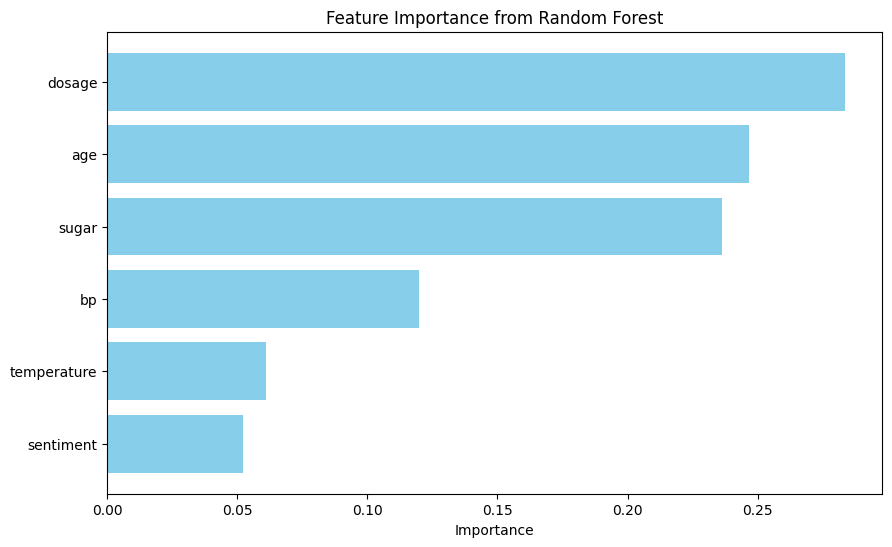

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importances from the Random Forest model
feature_importances_rf = best_rf_model.feature_importances_

# Create a DataFrame to visualize the feature importances
features_df = pd.DataFrame({
    'Feature': features,  # Use 'features' directly since it's a list
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()



In [37]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 453.1/453.1 kB 865.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 875.4 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 1.3 MB/s eta 0:00:0000:0100:010m

[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


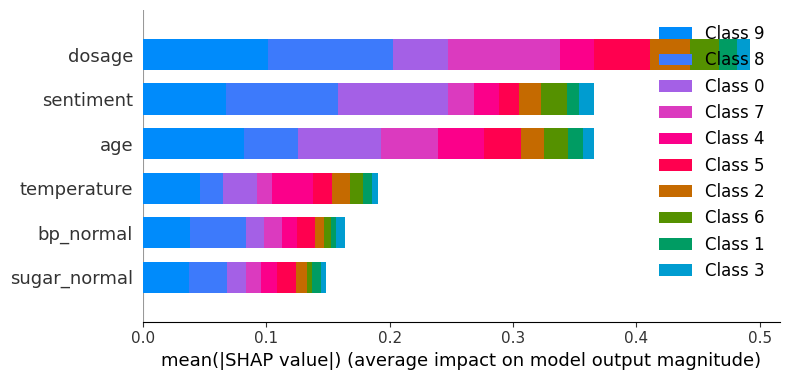

In [38]:
import shap

# Initialize the SHAP Explainer with the Random Forest model
explainer = shap.TreeExplainer(best_rf_model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summarize the effects of all features
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [39]:
!pip install nltk pandas


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [40]:
import pandas as pd
import re
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Load reviews from a CSV file
reviews_df = pd.read_csv('drug1 2.csv', usecols=['review'])

# Function to extract dosages from reviews
def extract_dosage(review):
    return re.findall(r'\d+mg', review)

# Apply the function to extract dosages
reviews_df['dosage'] = reviews_df['review'].apply(extract_dosage)

# Sentiment analysis to determine the sentiment of the review
sia = SentimentIntensityAnalyzer()
reviews_df['sentiment'] = reviews_df['review'].apply(lambda review: sia.polarity_scores(review)['compound'])

# Display initial results
print(reviews_df[['dosage', 'sentiment']])

# Analyze dosage frequency and average sentiment
dosage_sentiment = reviews_df.explode('dosage').groupby('dosage').agg({
    'sentiment': ['mean', 'count']
}).reset_index()
dosage_sentiment.columns = ['Dosage', 'Average Sentiment', 'Review Count']

# Display the aggregated dosage sentiment analysis
print(dosage_sentiment)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/iramkamdar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


              dosage  sentiment
0             g]    -0.4596
1                 []     0.4215
2                 []     0.0000
3                 []     0.7086
4                 []    -0.8901
..               ...        ...
394               []    -0.8923
395               []     0.0727
396  [1200mg, 120mg]    -0.4993
397            g]     0.0000
398               []     0.3830

[399 rows x 2 columns]
    Dosage  Average Sentiment  Review Count
0    100mg           0.711607            15
1   1200mg          -0.499300            22
2    120mg          -0.499300            22
3    150mg           0.534600             8
4   1800mg           0.790600            16
5   2700mg           0.790600             8
6     30mg          -0.526700            16
7     45mg          -0.459600             7
8     50mg           0.913900             7
9      5mg          -0.024400            34
10    60mg          -0.526700             8


In [41]:
!pip install matplotlib seaborn



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: pip install --upgrade pip




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



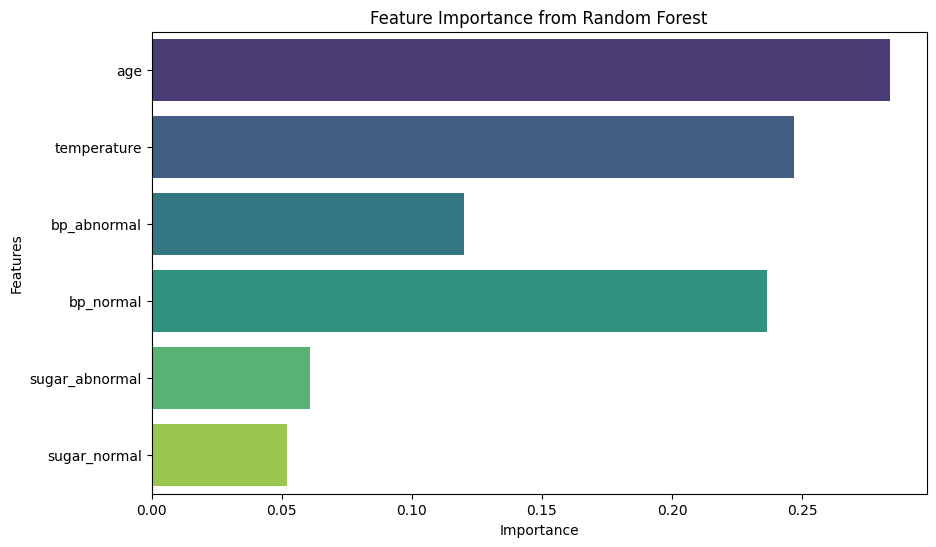



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



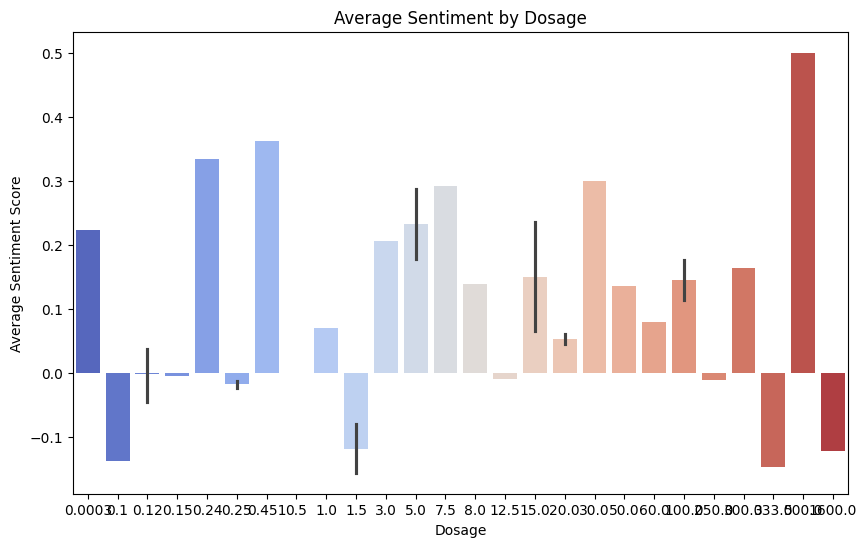

<Figure size 1000x600 with 0 Axes>

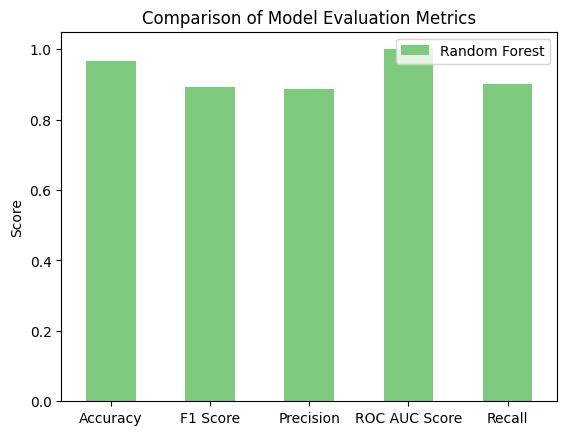

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Assuming you have a trained Random Forest model and feature names in 'features'
features_list = ['age', 'temperature', 'bp_abnormal', 'bp_normal', 'sugar_abnormal', 'sugar_normal']

feature_importances_rf = best_rf_model.feature_importances_
features = features_list  # features_list is a list of feature names used in the model

# Feature Importance Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_rf, y=features, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Assuming 'drug1_df' is a DataFrame with the correct columns
dosage_df = drug1_df[['dosage', 'sentiment']]

# Dosage Analysis Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='dosage', y='sentiment', data=dosage_df, palette='coolwarm')
plt.title('Average Sentiment by Dosage')
plt.ylabel('Average Sentiment Score')
plt.xlabel('Dosage')
plt.show()


# Assuming you have a dictionary or DataFrame 'metrics' for the models
metrics_df = pd.DataFrame(metrics)  # metrics_dict contains metrics with models as keys

# Model Evaluation Metrics Visualization
plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', colormap='Accent')
plt.title('Comparison of Model Evaluation Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()



In [46]:
print(drug1_df.columns)


Index(['drug', 'dosage', 'condition', 'review', 'rating', 'usefulCount', 'bp',
       'sugar', 'temperature', 'age', 'Sideeffects', 'sentiment'],
      dtype='object')
